In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modules import *

In [8]:
api = UpbitAPI()

In [9]:
api.market(is_details=True)

,market_warning,market,korean_name,english_name
0,NONE,KRW-BTC,비트코인,Bitcoin
1,NONE,KRW-ETH,이더리움,Ethereum
2,NONE,BTC-ETH,이더리움,Ethereum
3,NONE,BTC-XRP,리플,Ripple
4,NONE,BTC-ETC,이더리움클래식,Ethereum Classic
...,...,...,...,...
289,NONE,BTC-ATM,아틀레티코마드리드,Atletico De Madrid Fan Token
290,NONE,BTC-BAR,FC바르셀로나,FC Barcelona Fan Token
291,NONE,BTC-CITY,맨체스터시티,Manchester City Fan Token
292,NONE,BTC-INTER,인터밀란,Inter Milan Fan Token


In [10]:
btc_day = api.day_candle(market="BTC-ETH", count=100)
btc_day.head()

,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
datetime64_kst,,,,,,
2023-01-16 09:00:00,0.074550,0.074550,0.072390,0.073666,0.527834,7.211150
2023-01-15 09:00:00,0.073000,0.074337,0.072846,0.073674,0.441461,6.018812
2023-01-14 09:00:00,0.073000,0.075000,0.072400,0.073800,6.607549,88.870703
2023-01-13 09:00:00,0.075518,0.075518,0.073000,0.073100,1.000411,13.533329
2023-01-12 09:00:00,0.077122,0.077844,0.074796,0.075697,1.110616,14.519107


In [11]:
btc_day = api.day_candle(market="BTC-ETH", count=100, ohlcv=False)
btc_day.head()

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,converted_trade_price,datetime64_kst,datetime64_utc
0,BTC-ETH,2023-01-16T00:00:00,2023-01-16T09:00:00,0.074550,0.074550,0.072390,0.073666,1673872176592,0.527834,7.211150,0.073674,-0.000007,-0.000098,1.906928e+06,2023-01-16 09:00:00,2023-01-16
1,BTC-ETH,2023-01-15T00:00:00,2023-01-15T09:00:00,0.073000,0.074337,0.072846,0.073674,1673803378979,0.441461,6.018812,0.073800,-0.000126,-0.001713,1.903431e+06,2023-01-15 09:00:00,2023-01-15
2,BTC-ETH,2023-01-14T00:00:00,2023-01-14T09:00:00,0.073000,0.075000,0.072400,0.073800,1673735813286,6.607549,88.870703,0.073100,0.000700,0.009576,1.910018e+06,2023-01-14 09:00:00,2023-01-14
3,BTC-ETH,2023-01-13T00:00:00,2023-01-13T09:00:00,0.075518,0.075518,0.073000,0.073100,1673654392765,1.000411,13.533329,0.075697,-0.002597,-0.034302,1.813026e+06,2023-01-13 09:00:00,2023-01-13
4,BTC-ETH,2023-01-12T00:00:00,2023-01-12T09:00:00,0.077122,0.077844,0.074796,0.075697,1673564289261,1.110616,14.519107,0.077072,-0.001376,-0.017851,1.782805e+06,2023-01-12 09:00:00,2023-01-12


In [12]:
btc_day.dtypes

market                             object
candle_date_time_utc               object
candle_date_time_kst               object
opening_price                     float64
high_price                        float64
low_price                         float64
trade_price                       float64
timestamp                           int64
candle_acc_trade_price            float64
candle_acc_trade_volume           float64
prev_closing_price                float64
change_price                      float64
change_rate                       float64
converted_trade_price             float64
datetime64_kst             datetime64[ns]
datetime64_utc             datetime64[ns]
dtype: object

In [13]:
krw_ticker = api.ticker(markets=["KRW-BTC", "KRW-XRP"])
krw_ticker

,market,opening_price,high_price,low_price,trade_price,prev_closing_price,acc_trade_price_24h,acc_trade_volume_24h
datetime64_kst,,,,,,,,
2023-01-16 21:47:05,KRW-BTC,25857000,26500000,25600000,25887000,25836000.0,1.284209e+11,4.943243e+03
2023-01-16 21:47:06,KRW-XRP,477,503,474,480,476.0,2.229445e+11,4.596805e+08


In [14]:
krw_ticker = api.ticker(markets=["KRW-BTC", "KRW-XRP"], ohlcv=False)
krw_ticker

,market,trade_date,trade_time,trade_date_kst,trade_time_kst,trade_timestamp,opening_price,high_price,low_price,trade_price,...,acc_trade_price_24h,acc_trade_volume,acc_trade_volume_24h,highest_52_week_price,highest_52_week_date,lowest_52_week_price,lowest_52_week_date,timestamp,datetime64_kst,datetime64_utc
0,KRW-BTC,20230116,124705,20230116,214705,1673873225564,25857000,26500000,25600000,25887000,...,1.284209e+11,3.668869e+03,4.943243e+03,57678000.0,2022-03-28,20700000.0,2022-12-30,1673873225607,2023-01-16 21:47:05,2023-01-16 12:47:05
1,KRW-XRP,20230116,124706,20230116,214706,1673873226781,477,503,474,480,...,2.229445e+11,3.537947e+08,4.596805e+08,1115.0,2022-02-08,384.0,2022-06-14,1673873226840,2023-01-16 21:47:06,2023-01-16 12:47:06


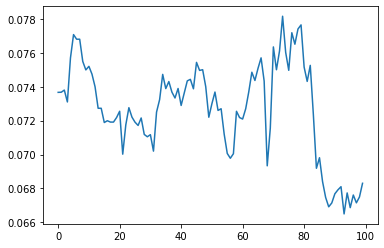

In [15]:
btc_day["trade_price"].plot()
plt.show()

In [16]:
api.ticker(["BTC-ETH", "KRW-BTC", "BTC-XRP"])

,market,opening_price,high_price,low_price,trade_price,prev_closing_price,acc_trade_price_24h,acc_trade_volume_24h
datetime64_kst,,,,,,,,
2023-01-16 21:29:36,BTC-ETH,7.454988e-02,7.455000e-02,7.238999e-02,7.366640e-02,7.367359e-02,6.458607e-01,8.812691
2023-01-16 21:47:07,KRW-BTC,2.585700e+07,2.650000e+07,2.560000e+07,2.588700e+07,2.583600e+07,1.284209e+11,4943.243220
2023-01-16 21:09:45,BTC-XRP,1.848000e-05,1.918000e-05,1.834000e-05,1.859000e-05,1.848000e-05,1.332149e+01,721357.263479


In [17]:
api.ticker(["BTC-ETH", "KRW-BTC", "BTC-XRP"], ohlcv=False)

,market,trade_date,trade_time,trade_date_kst,trade_time_kst,trade_timestamp,opening_price,high_price,low_price,trade_price,...,acc_trade_price_24h,acc_trade_volume,acc_trade_volume_24h,highest_52_week_price,highest_52_week_date,lowest_52_week_price,lowest_52_week_date,timestamp,datetime64_kst,datetime64_utc
0,BTC-ETH,20230116,122936,20230116,212936,1673872176000,7.454988e-02,7.455000e-02,7.238999e-02,7.366640e-02,...,6.458607e-01,7.211150,8.812691,8.530000e-02,2022-09-07,4.831850e-02,2022-06-13,1673872200065,2023-01-16 21:29:36,2023-01-16 12:29:36
1,KRW-BTC,20230116,124713,20230116,214713,1673873233510,2.585700e+07,2.650000e+07,2.560000e+07,2.589100e+07,...,1.284209e+11,3668.911640,4943.243220,5.767800e+07,2022-03-28,2.070000e+07,2022-12-30,1673873233570,2023-01-16 21:47:13,2023-01-16 12:47:13
2,BTC-XRP,20230116,120945,20230116,210945,1673870985000,1.848000e-05,1.918000e-05,1.834000e-05,1.859000e-05,...,1.332149e+01,603392.690147,721357.263479,2.865000e-05,2022-09-23,1.237000e-05,2022-06-12,1673871000046,2023-01-16 21:09:45,2023-01-16 12:09:45


In [18]:
btc_orderbook = api.orderbook(["KRW-BTC"])
btc_orderbook

,market,timestamp,total_ask_size,total_bid_size,orderbook_units
0,KRW-BTC,1673873239712,6.387825,1.713617,"[{'ask_price': 25908000.0, 'bid_price': 258920..."


In [19]:
btc_orderbook["orderbook_units"].loc[0][:5]

[{'ask_price': 25908000.0,
  'bid_price': 25892000.0,
  'ask_size': 0.05921257,
  'bid_size': 0.07051051},
 {'ask_price': 25909000.0,
  'bid_price': 25891000.0,
  'ask_size': 0.00023158,
  'bid_size': 0.41032885},
 {'ask_price': 25910000.0,
  'bid_price': 25887000.0,
  'ask_size': 0.53204658,
  'bid_size': 0.05511224},
 {'ask_price': 25911000.0,
  'bid_price': 25886000.0,
  'ask_size': 0.43009036,
  'bid_size': 0.03046844},
 {'ask_price': 25913000.0,
  'bid_price': 25885000.0,
  'ask_size': 0.09045045,
  'bid_size': 0.21340422}]

In [20]:
api.top_markets_by_trade_price("KRW", 5)

,market,opening_price,high_price,low_price,trade_price,prev_closing_price,acc_trade_price_24h,acc_trade_volume_24h
datetime64_kst,,,,,,,,
2023-01-16 21:47:20,KRW-SOL,28400.0,31180.0,27800.0,29010.0,28400.0,3.889932e+11,1.331212e+07
2023-01-16 21:47:22,KRW-APT,9810.0,10770.0,9400.0,10170.0,9810.0,3.248323e+11,3.171024e+07
2023-01-16 21:47:21,KRW-MANA,865.0,924.0,830.0,877.0,865.0,2.370427e+11,2.778923e+08
2023-01-16 21:47:21,KRW-XRP,477.0,503.0,474.0,480.0,476.0,2.229445e+11,4.596805e+08
2023-01-16 21:47:21,KRW-SRM,714.0,745.0,656.0,687.0,718.0,2.076458e+11,2.962489e+08


In [21]:
help(api.top_markets_by_trade_price)

Help on method top_markets_by_trade_price in module modules.api:

top_markets_by_trade_price(keyword='', k=-1, ohlcv=True) method of modules.api.UpbitAPI instance
    하루 기준 거래 대금이 가장 많은 시장 순으로 k개 출력하는 메소드, keyword로 마켓 필터



In [22]:
eth_min = api.min_candle(market="BTC-ETH", count=2500)
eth_min.head()

,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
datetime64_kst,,,,,,
2023-01-16 21:29:00,0.073666,0.073666,0.073666,0.073666,0.003683,0.050000
2023-01-16 20:38:00,0.073665,0.073665,0.072390,0.072390,0.085283,1.160487
2023-01-16 20:29:00,0.073815,0.073815,0.073815,0.073815,0.007381,0.100000
2023-01-16 20:02:00,0.073815,0.073815,0.073815,0.073815,0.006402,0.086728
2023-01-16 19:56:00,0.074413,0.074413,0.074413,0.074413,0.002905,0.039034


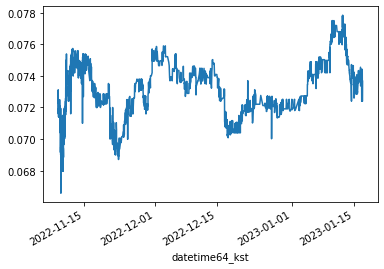

In [23]:
eth_min["trade_price"].plot()
plt.show()